In [1]:
# Download and unzip
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fvk7h5dg2p-1.zip


--2020-10-27 12:53:36--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fvk7h5dg2p-1.zip
Resolviendo md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.60.216
Conectando con md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)[52.218.60.216]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 198985388 (190M) [application/octet-stream]
Guardando como: “dataroot/fvk7h5dg2p-1.zip”

fvk7h5dg2p-1.zip    100%[===================>] 189,77M  6,87MB/s    en 47s     

2020-10-27 12:54:24 (4,04 MB/s) - “dataroot/fvk7h5dg2p-1.zip” guardado [198985388/198985388]



In [2]:
# Unzip
import zipfile
with zipfile.ZipFile(dataroot+"fvk7h5dg2p-1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)

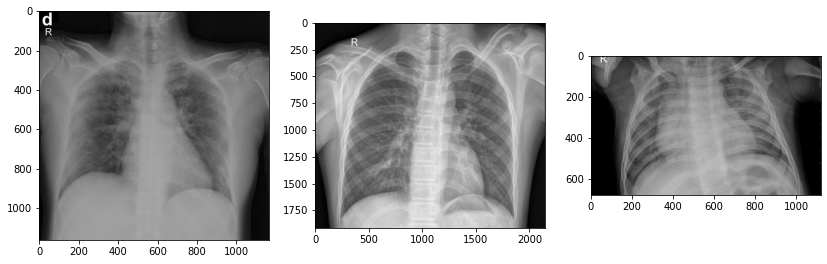

In [6]:
# Load and preview images
import matplotlib.pyplot as plt
import numpy as np
import cv2

dataroot = "dataroot/"
img_covid     = cv2.imread(dataroot+'COVID-19 cases/1-s2.0-S0929664620300449-gr2_lrg-d.jpg',0)
img_normal    = cv2.imread(dataroot+'Normal /IM-0011-0001-0001.jpeg',0)
img_pneumonia = cv2.imread(dataroot+'Pneumonia/person1650_virus_2854.jpeg',0)

i = 1
plt.figure(figsize=(14,14))
plt.subplot(i,3,1)
plt.imshow(img_covid,cmap='gray')
plt.subplot(i,3,2)
plt.imshow(img_normal,cmap='gray')
plt.subplot(i,3,3)
plt.imshow(img_pneumonia,cmap='gray')